In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression, make_swiss_roll
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

MACHINE LEARNING

II - UNSUPERVISED LEARNING - KMeans using PCA (Principal Component Analysis) & T-SNE

In [ ]:
# Import the data
# file_path = Path("/content/Copy_of_myopia.csv")
# df = pd.read_csv(file_path)
url = 'https://raw.githubusercontent.com/mward95/project_4/main/data/Copy_of_myopia.csv'
df = pd.read_csv(url)
df.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [ ]:
# There were 81 myopic children samples and 537 non-myopic children samples
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [ ]:
labels = df['MYOPIC']
labels.value_counts().nunique()

2

In [ ]:
# Remove the Myopic Column
df = df.drop(columns=["MYOPIC", "DIOPTERHR", 'STUDYYEAR'])
df.head()

,ID,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,MOMMY,DADMY
0,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,1,1
1,2,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,1,1
2,3,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,0,0
3,4,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,0,1
4,5,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,1,0


In [ ]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column ID has 0 null values
Column AGE has 0 null values
Column GENDER has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [ ]:
# Find duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


Applying Dimensional Reduction

1 - Using PCA

In [ ]:
# Standarize data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(df)
print(myopia_scaled[0:2])

[[-1.7292504  -0.42021911  1.02291623 -1.36391691 -0.89286055  0.4837838
  -0.28144248 -1.01979129  4.1506609   1.69744958 -0.68931054 -0.67299591
   0.18405806  0.98713773  1.0032415 ]
 [-1.72364505 -0.42021911  1.02291623 -0.3086122  -0.17183857  0.53591074
  -0.96799697 -0.13076248 -0.99889822 -0.91206246 -0.36187479 -0.22140908
  -0.34093217  0.98713773  1.0032415 ]]


In [ ]:
# Applying PCA to reduce dimensions from 16 to 2

# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the myopia data.
myopia_pca = pca.fit_transform(myopia_scaled)

In [ ]:
x_pca = pca.transform(myopia_scaled)
print(myopia_scaled.shape)
print(x_pca.shape)

(618, 15)
(618, 2)


Text(0, 0.5, 'Principal component 2')

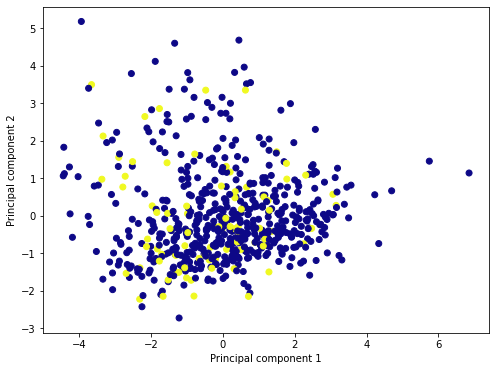

In [ ]:
plt.figure (figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap = 'plasma')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')


### x_pca helped compress the 15 columns to 2 columns - The graph above shows Myopic and Non-Myopic children data when plotted against the 2 Principal components

In [ ]:
pca.components_

array([[ 0.04695479, -0.25067402,  0.26131   ,  0.24523602, -0.52768754,
        -0.34404291,  0.32188278, -0.49579084, -0.1176089 , -0.05330901,
        -0.1218621 , -0.14505618, -0.07332685, -0.04592852, -0.01567779],
       [ 0.18015738,  0.40998866,  0.14366276, -0.00683137, -0.13991286,
        -0.10419141,  0.132353  , -0.13776804,  0.26934601,  0.48526316,
         0.11853235,  0.5795775 ,  0.17983528, -0.13751734, -0.05097848]])

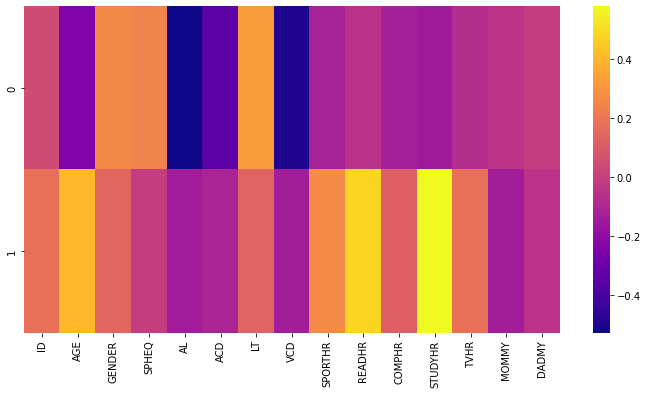

In [ ]:
df_comp = pd.DataFrame(pca.components_,columns=df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma',)

### The Heat map above shows the range of compressed values (using PCA) of the specific variables in each of the DataFrame columns that fall in either of the 2 PCA columns. This data DOES NOT show the relevancy of the specific column to Myopia   
for example if we had 3 Principal components instead of 2, the heat map would be the following:
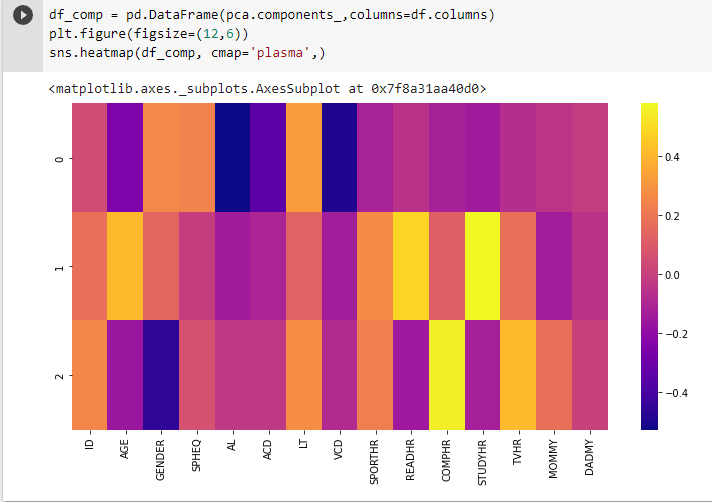

In [ ]:
# Transform PCA data to a DataFrame
df_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2"] 
    # , "principal component 3"]
)
# , "principal component 3", "principal component 4", "principal component 5", "principal component 6", "principal component 7", "principal component 8", "principal component 9", "principal component 10", "principal component 11", "principal component 12"]
df_pca

,principal component 1,principal component 2
0,0.203107,1.172731
1,0.082368,-1.608697
2,0.623540,-0.881870
3,0.664669,0.762142
4,-1.213661,-2.726806
...,...,...
613,0.517189,0.171618
614,0.162119,-1.185297
615,-0.411520,-1.728994
616,1.491431,0.381946


In [ ]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.1928507 , 0.10385914])

2 - Using T-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# Initialize t-SNE model
tsne = TSNE(learning_rate='auto')

In [ ]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

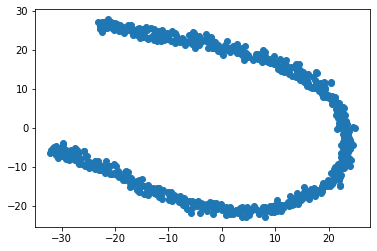

In [ ]:
# Create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

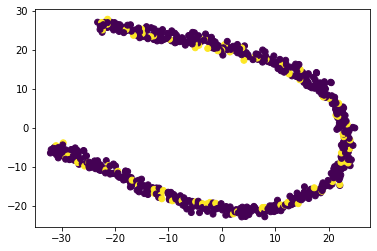

In [ ]:
# Create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)

## Cluster Analysis with K-means

In [ ]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,2750.500258
1,2,1615.240281
2,3,1089.792670
3,4,822.035653
4,5,668.771374


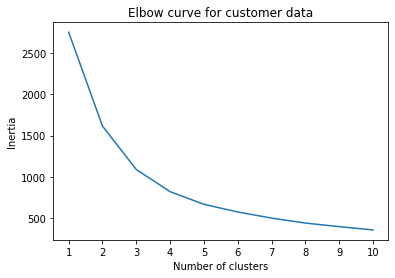

In [ ]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [ ]:
def get_clusters(k, df_pca):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(df_pca)

    # Predict clusters
    predictions = model.predict(df_pca)

    # Create return DataFrame with predicted clusters
    df_pca["class"] = model.labels_

    return df_pca

In [ ]:
clusters = get_clusters(3, df_pca)

In [ ]:
clusters

,principal component 1,principal component 2,class
0,0.203107,1.172731,2
1,0.082368,-1.608697,1
2,0.623540,-0.881870,2
3,0.664669,0.762142,2
4,-1.213661,-2.726806,1
...,...,...,...
613,0.517189,0.171618,2
614,0.162119,-1.185297,1
615,-0.411520,-1.728994,1
616,1.491431,0.381946,2


In [ ]:
def show_clusters(df_pca):
    plt.figure(figsize=(15,8))
    plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'], c=df_pca['class'])
    plt.xlabel('PCA 1', fontsize = 15)
    plt.ylabel('PCA 2', fontsize = 15)
    plt.title(label = 'Myopia Clusters', 
              fontsize = 20, 
              fontweight = 20)
    plt.show()

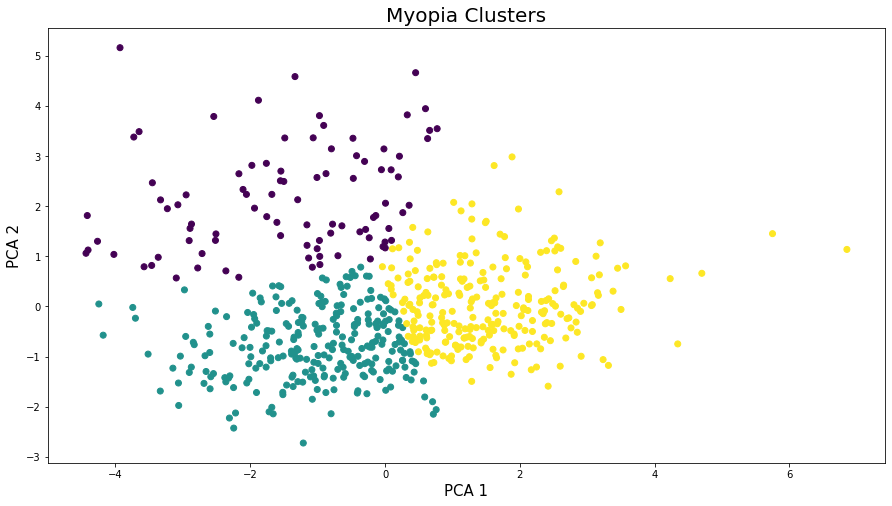

In [ ]:
show_clusters(clusters)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(df_pca, labels)

-0.0007670769349424375